In [1]:
import pandas as pd

In [2]:
df_booking = pd.read_csv('../data/reviews_booking.csv', low_memory=False)

In [3]:
df_booking.columns

Index(['Unnamed: 0', 'País', 'Acomodación', 'Noches', 'Fecha hospedaje',
       'Grupo viaje', 'Fecha reseña', 'Titulo', 'Calificación',
       'Cosas Positivas', 'Cosas Negativas', 'reseña'],
      dtype='object')

In [4]:
df_booking['Titulo']

0                                     Excepcional
1                                      Fantástica
2                                     Excepcional
3         Gran apartamento en una gran ubicación.
4                                     Excepcional
                           ...                   
438208                                 Fantástico
438209                                Excepcional
438210                                     Pésimo
438211                                Excepcional
438212                                  excelente
Name: Titulo, Length: 438213, dtype: object

In [5]:
df_selected = df_booking[['País', 'Noches', 'Titulo', 'Calificación', 'Cosas Positivas', 'Cosas Negativas', 'reseña']]

In [6]:
df_selected['reseña'].value_counts()

reseña
Sí    248829
No    189384
Name: count, dtype: int64

In [7]:
df_first_tranformation = df_selected.copy()
df_first_tranformation['Calificación'] = df_first_tranformation['Calificación'].str.replace(',', '.')
df_first_tranformation['Calificación'] = pd.to_numeric(df_first_tranformation['Calificación'], errors='coerce')

In [8]:
df_second_tranformation = df_first_tranformation.copy()
df_second_tranformation['Noches'] = df_second_tranformation['Noches'].str.extract(r'(\d+)')
df_second_tranformation['Noches'] = pd.to_numeric(df_second_tranformation['Noches'], errors='coerce')
df_second_tranformation['Noches'] = df_second_tranformation['Noches'].fillna(1)
df_second_tranformation['Cosas Positivas'] = df_second_tranformation['Cosas Positivas'].where(df_second_tranformation['Calificación'] > 7, '')
df_second_tranformation['Cosas Positivas'] = df_second_tranformation['Cosas Positivas'].fillna('')
df_second_tranformation['Cosas Negativas'] = df_second_tranformation['Cosas Negativas'].where(df_second_tranformation['Calificación'] <= 7, '')
df_second_tranformation['Cosas Negativas'] = df_second_tranformation['Cosas Negativas'].fillna('')
df_second_tranformation.head()

,País,Noches,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,2,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,,Sí
1,Colombia,4,Fantástica,10.0,"Ubicación, comodidades y limpieza",,Sí
2,Colombia,1,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",,Sí
3,Colombia,1,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,,Sí
4,Colombia,3,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",,Sí


In [9]:
df_filtered = df_second_tranformation[(df_second_tranformation['reseña'].notnull()) & (df_second_tranformation['reseña'] == 'Sí')]
print(f"reseña filter: {df_filtered.shape}")
df_filtered = df_filtered[
    (df_filtered['Noches'].notnull())
    &
    (df_filtered['Titulo'].notnull())
    &
    (
        (df_filtered['Calificación'].notna())
    )
]
print(f"noches, titulo, calificación filter: {df_filtered.shape}")
# filter in, if Calificación >= 8 then Cosas Positivas must have some text
df_filtered = df_filtered.drop(df_filtered[
    (df_filtered['Calificación'] >= 8)
    &
    (
        (df_filtered['Cosas Positivas'].isnull())
        |
        (df_filtered['Cosas Positivas'].str.strip() == '')
        |
        (df_filtered['Cosas Positivas'].isna())
    )
].index)
print(f"calificación >= 8 filter: {df_filtered.shape}")

# filter in, if Calificación < 8 then Cosas Negativas must have some text
df_filtered = df_filtered.drop(df_filtered[
    (df_filtered['Calificación'] < 8)
    &
    (
        (df_filtered['Cosas Negativas'].isnull())
        |
        (df_filtered['Cosas Negativas'].str.strip() == '')
        |
        (df_filtered['Cosas Negativas'].isna())
    )
].index)
print(f"calificación < 8 filter: {df_filtered.shape}")
valid_esp_countries = ['España', 'México', 'Argentina', 'Colombia', 'Chile', 'Perú', 'Venezuela', 'Ecuador', 'Guatemala', 'Cuba', 'Bolivia', 'República Dominicana', 'Honduras', 'Paraguay', 'El Salvador', 'Nicaragua', 'Costa Rica', 'Puerto Rico', 'Panamá', 'Uruguay']
df_filtered = df_filtered[df_filtered['País'].isin(valid_esp_countries)]
print(f"country filter: {df_filtered.shape}")

reseña filter: (248829, 7)
noches, titulo, calificación filter: (248786, 7)
calificación >= 8 filter: (244978, 7)
calificación < 8 filter: (242345, 7)
country filter: (179521, 7)


In [10]:
df_filtered.head()

,País,Noches,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,2,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,,Sí
1,Colombia,4,Fantástica,10.0,"Ubicación, comodidades y limpieza",,Sí
2,Colombia,1,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",,Sí
3,Colombia,1,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,,Sí
4,Colombia,3,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",,Sí


In [11]:
df_stable = df_second_tranformation.copy().reset_index(drop=True)
df_stable.head()

,País,Noches,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,2,Excepcional,10.0,Fue la Mejor Opción que pudimos haber tomado e...,,Sí
1,Colombia,4,Fantástica,10.0,"Ubicación, comodidades y limpieza",,Sí
2,Colombia,1,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento...",,Sí
3,Colombia,1,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relaci...,,Sí
4,Colombia,3,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excel...",,Sí


## Analysis

In [12]:
from matplotlib import pyplot as plt

/Users/sero/Documents/datascience_master/nat_language/workdir/ean_nlp_projects/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


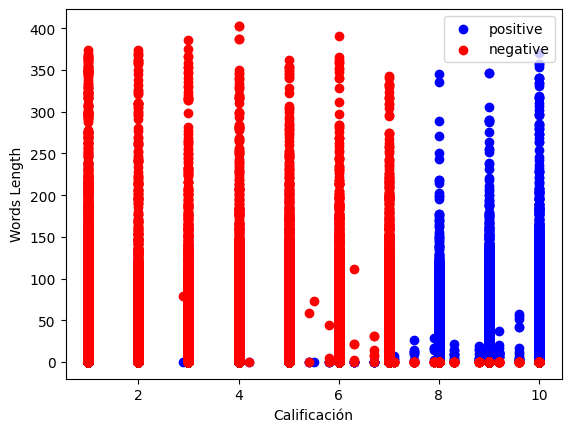

In [13]:
df_stable['positive_words_length'] = df_stable['Cosas Positivas'].str.split().apply(len)
df_stable['negative_words_length'] = df_stable['Cosas Negativas'].str.split().apply(len)

plt.scatter(df_stable['Calificación'], df_stable['positive_words_length'], color='blue', label='positive')
plt.scatter(df_stable['Calificación'], df_stable['negative_words_length'], color='red', label='negative')
plt.xlabel('Calificación')
plt.ylabel('Words Length')
plt.legend()
plt.show()

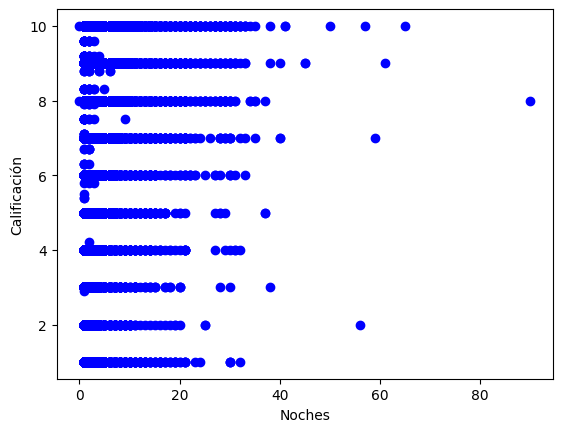

In [14]:
# plot noches vs calificación
plt.scatter(df_stable['Noches'], df_stable['Calificación'], color='blue')
plt.xlabel('Noches')
plt.ylabel('Calificación')
plt.show()

## Data transformation

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import set_config


set_config(display='pandas')

In [16]:
df_usable = df_stable.copy()
df_usable = df_usable.drop(['País', 'reseña', 'Noches'], axis=1)

In [17]:
class ReviewTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['review'] = X['Titulo'] + ' ' + X['Cosas Positivas'] + ' ' + X['Cosas Negativas']
        return X

In [18]:
class TargetTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['target'] = X['Calificación'].apply(lambda x: 1 if x >= 8 else 0)
        return X

In [19]:
class TextNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X['review'] = X['review'].str.lower()
        # X['review'] = X['review'].str.replace(r'[^a-z0-9\sáéíóú]', '').str.strip()
        return X

In [20]:
first_preprocessing = make_pipeline(
    ReviewTransformer(),
    TargetTransformer(),
    TextNormalizer()
)
df_res = first_preprocessing.fit_transform(df_usable)
print(f"First res shape: {df_res.shape}")
df_res = df_res.drop(
    df_res[df_res['review'].str.len() == 0].index
)
print(f"Second res shape: {df_res.shape}")

First res shape: (438213, 8)
Second res shape: (438213, 8)


In [21]:
df_transformed = df_res[['review', 'target']].reset_index(drop=True)
df_transformed.head()

,review,target
0,excepcional fue la mejor opción que pudimos ha...,1
1,"fantástica ubicación, comodidades y limpieza",1
2,"excepcional el lugar esta muy bien ubicado, el...",1
3,gran apartamento en una gran ubicación. todo e...,1
4,"excepcional es muy cómodo y acogedor, la atenc...",1


In [22]:
df_transformed.shape

(438213, 2)

In [23]:
df_transformed.dropna(inplace=True)

In [24]:
df_transformed.shape

(437552, 2)

## Training: CountVectorizer and GradientBoostingClassifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer

### Pipeline

In [26]:
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', GradientBoostingClassifier(max_depth=8, min_samples_split=6, n_estimators=180, random_state=20241130))
])

### Training

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_transformed['review'], df_transformed['target'], test_size=0.2, random_state=20241130)

In [28]:
trained_pipe = pipeline.fit(x_train, y_train)
trained_pipe

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=8, min_samples_split=6,
                                            n_estimators=180,
                                            random_state=20241130))])

### Validation

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
y_pred = trained_pipe.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80     18481
           1       0.94      0.96      0.95     69030

    accuracy                           0.92     87511
   macro avg       0.88      0.87      0.87     87511
weighted avg       0.92      0.92      0.92     87511



In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 14371
False Positives: 4110
False Negatives: 3037
True Positives: 65993


### Training: Doc2Vec and GradientBoostingClassifier

In [33]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [34]:
df_doc = df_transformed.copy()

In [35]:
df_doc['review_tokens'] = df_doc['review'].apply(lambda x: x.split())

In [36]:
tagged_docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(df_doc['review_tokens'])]

In [37]:
d2v_mod = Doc2Vec(tagged_docs, vector_size=100, window=2, min_count=1, workers=4)

#### Save and Load model

In [38]:
d2v_mod.save("../models/booking_doc2vec.model")

In [39]:
d2v_mod = Doc2Vec.load("../models/booking_doc2vec.model")

### Validation

In [40]:
d2v_mod.wv.most_similar('mal')

[('pésimo', 0.8528085350990295),
 ('aceptable', 0.79474937915802),
 ('regular', 0.784342348575592),
 ('decepcionante', 0.7754964232444763),
 ('bien', 0.7730273604393005),
 ('agradable', 0.6992626786231995),
 ('mal,', 0.6504109501838684),
 ('fantástico', 0.6474305391311646),
 ('excepcional', 0.646378219127655),
 ('normal', 0.6430110931396484)]

In [41]:
d2v_mod.wv.most_similar('excelente')

[('exelente', 0.9021160006523132),
 ('buena', 0.8554985523223877),
 ('increíble', 0.8308255076408386),
 ('espectacular', 0.8284937739372253),
 ('genial', 0.8246389031410217),
 ('excelente.', 0.8077729940414429),
 ('excelente,', 0.8009641766548157),
 ('perfecta', 0.7995492219924927),
 ('buen', 0.7973801493644714),
 ('excelente!', 0.79475998878479)]

### Training d2v and GradientBoostingClassifier

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
df_doc['d2v_vectors'] = [d2v_mod.infer_vector(doc) for doc in df_doc['review_tokens']]

In [51]:
gb_mod = GradientBoostingClassifier(max_depth=8, min_samples_split=6, n_estimators=180, random_state=20241130)

In [52]:
x_d2v_train, x_d2v_test, y_d2v_train, y_d2v_test = train_test_split(df_doc['d2v_vectors'].to_list(), df_doc['target'], test_size=0.2, random_state=20241130)

In [53]:
trained_gb = gb_mod.fit(x_d2v_train, y_d2v_train)

In [54]:
y_d2v_preds = gb_mod.predict(x_d2v_test)

In [55]:
print(classification_report(y_d2v_test, y_d2v_preds))

              precision    recall  f1-score   support

           0       0.79      0.61      0.69     18481
           1       0.90      0.96      0.93     69030

    accuracy                           0.88     87511
   macro avg       0.85      0.78      0.81     87511
weighted avg       0.88      0.88      0.88     87511



In [56]:
tn, fp, fn, tp = confusion_matrix(y_d2v_test, y_d2v_preds).ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 11313
False Positives: 7168
False Negatives: 2957
True Positives: 66073


#### Save model

In [57]:
import joblib

joblib.dump(gb_mod, "../models/booking_gb_model.pkl")

['../models/booking_gb_model.pkl']

### Clustering Kmeans

In [42]:
from sklearn.cluster import KMeans

In [44]:
d2v_kmeans = KMeans(n_clusters=2, random_state=20241130)

In [45]:
d2v_kmeans.fit(df_doc['d2v_vectors'])

KMeans(n_clusters=2, random_state=20241130)

In [46]:
df_d2v_clustering = df_doc.copy()
df_d2v_clustering['cluster'] = d2v_kmeans.labels_

In [47]:
df_d2v_clustering['cluster'].value_counts()

cluster
0    361543
1     76009
Name: count, dtype: int64

In [48]:
df_d2v_clustering['target'].value_counts()

target
1    345252
0     92300
Name: count, dtype: int64